<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Web APIs & NLP

# Data Cleaning and Preprocessing

# Table of Contents:
- [Import Libraries](#Import-Libraries)
- [Functions](#Functions)
- [Import Data](#Import-Data)
- [Stemming VS Lemmatization](#Stemming-VS-Lemmatization)
- [Stop Words](#Stop-Words)
- [Unigrams, Bigrams and Trigrams](#Unigrams,-Bigrams-and-Trigrams)
- [Export to CSV](#Export-to-CSV)
- [Extras](#Extras)

---

# Import Libraries

In [1]:
# Basics
import pandas as pd
import numpy as np
import time

# Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

# Text Preproccessing
import re
import itertools
import string
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag

# Vectorizing
from sklearn.feature_extraction.text import CountVectorizer

# Word Cloud
from wordcloud import WordCloud

# Functions

### clean_text(text)
This function will convert a string of text to lower case, and remove special characters, hyperlinks, punctuation marks, overspaces, etc from it.

In [2]:
def clean_text(text):
    
    # remove html characters
    text = BeautifulSoup(text, "lxml").text
    
    # remove hyperlinks
    text = re.sub(r'https?:\/\/.\S+', "", text)
        
    # remove hashtags, only removing the hash # sign from the word
    text = re.sub(r'#', '', text)
        
    # remove trailing newline \n
    text = text.rstrip('\n')
        
    # remove ticks "'s" and the characters after the ticks
    text = re.sub("\'\w+", '', text)     
        
    # remove punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
        
    # remove unicode characters
    text = text.encode('ascii', 'ignore').decode()

    # replace over spaces
    text = re.sub('\s{2,}', " ", text)
        
    # convert to lower case
    text = text.lower()

    return text

### get_wordnet_pos(word)
This function maps Part of Speech (POS) tag to the first character which the lemmatizer in the lemmatize_text(text) function accepts.

In [3]:
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

### stemming_text(text)
This function takes in a string of text, tokenize each word in the text and process them by chopping the ends of words.

In [4]:
def stemming_text(text):
    # instantiate SnowballStemmer
    stemmer = SnowballStemmer(language = 'english')
    text = [stemmer.stem(x) for x in word_tokenize(text)] 
    
    return(" ".join(text))
    

### lemmatize_text(text)
This function takes in a string of text, tokenize each word in the text and performs lemmatizing on them.

In [5]:
def lemmatize_text(text):
    # instantiate WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(x, get_wordnet_pos(x)) for x in word_tokenize(text)]  
    
    return(" ".join(text))


### filter_stopwords(text)
This function takes in a string of text and filter stop words based on the stop word list. Words can be added or removed from the stop word list.

In [6]:
def filter_stopwords(text):
    # remove stop words
    stop_words = stopwords.words('english')
    stop_words = set(stopwords.words('english')) - {'not', 'are'}
    stop_words = set(stopwords.words("english")) | {'im', 'would', 'gon', 'na', 'hey', 'anyone', 
                                                    'dive', 'scuba', 'diver', 'surf', 'board', 
                                                    'wave', 'surfer', 'surfboard', 'look'}
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    return text

#stop_words = set(stopwords.words("english")) | {'hey', 'guys'}
#stop_words = set(stopwords.words("english")) - {"not, " "are"}

### get_top_n_words(corpus, n = None)
This function will return the frequency of the top (n) unigram words in the dataset

In [7]:
def get_top_n_words(corpus, n = None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [8]:
get_top_n_words(["I love Python", "Python is a language programming", "Hello world", "I love the world"])

[('love', 2),
 ('python', 2),
 ('world', 2),
 ('is', 1),
 ('language', 1),
 ('programming', 1),
 ('hello', 1),
 ('the', 1)]

### get_top_n_bigram(corpus, n = None)
This function will return the frequency of the top (n) unigram words in the dataset

In [9]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

### get_top_n_trigram(corpus, n = None)
This function will return the frequency of the top (n) unigram words in the dataset

In [10]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

---



# Import Data

In [11]:
df = pd.read_csv('../data/subreddits.csv', index_col=[0])
df.reset_index(drop = True)

,title,subreddit,selftext
0,Going diving tomorrow for an open water cert a...,scubadiving,Going diving tomorrow for an open water cert a...
1,Diving with swimmers ear,scubadiving,NaN
2,BIG HUNGRY FISH!,scubadiving,NaN
3,"Dusk at Blue Heron Bridge, Rivera Beach, FL - USA",scubadiving,&amp;#x200B;\n\nhttps://preview.redd.it/1nwkll...
4,Scuba Diving Evolution,scubadiving,NaN
...,...,...,...
4019,Need to change my stance?,surfing,NaN
4020,Guadeloupe christmas surf,surfing,"Hey!\nAnyone surfed the guadeloupe lately, how..."
4021,Searching for a rideshare for Fuerteventura th...,surfing,[removed]
4022,Epicly big for the gulf coast! Clearwater beach,surfing,NaN


---

# Data Cleaning

In [12]:
df.head(20)

,title,subreddit,selftext
0,Going diving tomorrow for an open water cert a...,scubadiving,Going diving tomorrow for an open water cert a...
1,Diving with swimmers ear,scubadiving,NaN
2,BIG HUNGRY FISH!,scubadiving,NaN
3,"Dusk at Blue Heron Bridge, Rivera Beach, FL - USA",scubadiving,&amp;#x200B;\n\nhttps://preview.redd.it/1nwkll...
4,Scuba Diving Evolution,scubadiving,NaN
5,Mark V *inspired* dive helmet lamp decoration ...,scubadiving,NaN
6,just starting and wondering about a piece of gear,scubadiving,Just looking for some info about a regulator s...
7,Near miss aka: the importance of making mistak...,scubadiving,This story also reflects the difference betwee...
8,A Nudibranch Called Phyllidia Ocellata Cuvier,scubadiving,NaN
9,36 on 05Jan2022,scubadiving,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4024 entries, 0 to 4023
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      4024 non-null   object
 1   subreddit  4024 non-null   object
 2   selftext   1555 non-null   object
dtypes: object(3)
memory usage: 125.8+ KB


In [14]:
df.isna().sum()

title           0
subreddit       0
selftext     2469
dtype: int64

In [15]:
df['selftext'] = df['selftext'].fillna('')

In [16]:
df.isna().sum()

title        0
subreddit    0
selftext     0
dtype: int64

In [17]:
df[df['selftext'] == '[removed]']

,title,subreddit,selftext
36,"Charge your mini diving cylinder anytime, anyw...",scubadiving,[removed]
37,"Charge your mini diving cylinder anytime, anyw...",scubadiving,[removed]
94,New A Diver's Life Video: Conserving Bonaire's...,scubadiving,[removed]
98,New Arrivals—SMACO S700 2L Tanks Mini Scuba Ta...,scubadiving,[removed]
103,New Arrivals—SMACO S700 2L Tanks Mini Scuba Ta...,scubadiving,[removed]
...,...,...,...
4009,"new to mass, any good spots in mass or nearby ...",surfing,[removed]
4012,Board bag for Flying with Board,surfing,[removed]
4015,Remote Work + Surfing in July/August,surfing,[removed]
4017,Need feedback on a product for surfers and get...,surfing,[removed]


In [18]:
df['selftext'] = df['selftext'].replace(['[removed]'],'')

In [19]:
df[df['selftext'] == '[removed]']

,title,subreddit,selftext


In [20]:
df[df['selftext'] == '[deleted]']

,title,subreddit,selftext
423,Can someone give me the answer to this question?,scubadiving,[deleted]
449,New A Diver's Life Video: Diving Bonaire's Res...,scubadiving,[deleted]
510,GoPros have gotten so much better at photos,scubadiving,[deleted]
540,Hello Redditors! We are a dive centre based in...,scubadiving,[deleted]
609,Vehicle recovery (DART),scubadiving,[deleted]
724,Found an old photo from my open water in 2006....,scubadiving,[deleted]
989,"Santa Cruz Island, California",scubadiving,[deleted]
1038,My cool trip from Cenote,scubadiving,[deleted]
1075,"Maybe a stupid question, But: Why do diving-co...",scubadiving,[deleted]
1141,Interesting find at a little known local spot,scubadiving,[deleted]


In [21]:
df['selftext'] = df['selftext'].replace(['[deleted]'],'')

In [22]:
df[df['selftext'] == '[deleted]']

,title,subreddit,selftext


In [23]:
#Create diving column when diving = 1, cycling = 0 
df['diving'] = df['subreddit'].map({'scubadiving':1,'surfing':0})
df.head()

,title,subreddit,selftext,diving
0,Going diving tomorrow for an open water cert a...,scubadiving,Going diving tomorrow for an open water cert a...,1
1,Diving with swimmers ear,scubadiving,,1
2,BIG HUNGRY FISH!,scubadiving,,1
3,"Dusk at Blue Heron Bridge, Rivera Beach, FL - USA",scubadiving,&amp;#x200B;\n\nhttps://preview.redd.it/1nwkll...,1
4,Scuba Diving Evolution,scubadiving,,1


In [24]:
df['diving'].value_counts()

1    2024
0    2000
Name: diving, dtype: int64

Check for and view duplicated rows

In [25]:
print(df[df.duplicated() == True])

                                                  title    subreddit selftext  \
40          Diver Diving Scuba Ocean scuba diving water  scubadiving            
46                               Scuba Diving Evolution  scubadiving            
52          Diver Diving Scuba Ocean scuba diving water  scubadiving            
68                                   Scuba Diving Diver  scubadiving            
69                               Scuba Diving Evolution  scubadiving            
...                                                 ...          ...      ...   
3919                                          Soft tops      surfing            
3922                            Weekend Question Thread      surfing            
3937       Nor’easter or hurricane? What do you prefer?      surfing            
3994  Cornish Surf (Canon AE1-P, Portra 160) Does an...      surfing            
3998                                The Wednesday Whine      surfing            

      diving  
40         1

Drop duplicated rows

In [26]:
df = df.drop_duplicates(subset=['title', 'subreddit'], keep = 'last')
df = df.reset_index(drop=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      3909 non-null   object
 1   subreddit  3909 non-null   object
 2   selftext   3909 non-null   object
 3   diving     3909 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 122.3+ KB


Check if a copy of the duplicated rows still remains

In [28]:
df[df['title'] == 'Scuba Diving Evolution']

,title,subreddit,selftext,diving
129,Scuba Diving Evolution,scubadiving,,1


## Combine 'title' and 'selftext'

In [29]:
df['text'] = df['title'] + ' ' + df['selftext']

In [30]:
df.head()

,title,subreddit,selftext,diving,text
0,Going diving tomorrow for an open water cert a...,scubadiving,Going diving tomorrow for an open water cert a...,1,Going diving tomorrow for an open water cert a...
1,Diving with swimmers ear,scubadiving,,1,Diving with swimmers ear
2,BIG HUNGRY FISH!,scubadiving,,1,BIG HUNGRY FISH!
3,"Dusk at Blue Heron Bridge, Rivera Beach, FL - USA",scubadiving,&amp;#x200B;\n\nhttps://preview.redd.it/1nwkll...,1,"Dusk at Blue Heron Bridge, Rivera Beach, FL - ..."
4,Mark V *inspired* dive helmet lamp decoration ...,scubadiving,,1,Mark V *inspired* dive helmet lamp decoration ...


In [31]:
df.drop(columns = ['title', 'subreddit', 'selftext'], axis = 1, inplace = True)

In [32]:
df.head()

,diving,text
0,1,Going diving tomorrow for an open water cert a...
1,1,Diving with swimmers ear
2,1,BIG HUNGRY FISH!
3,1,"Dusk at Blue Heron Bridge, Rivera Beach, FL - ..."
4,1,Mark V *inspired* dive helmet lamp decoration ...


In [33]:
df['diving'].value_counts()

0    1960
1    1949
Name: diving, dtype: int64

---

# Cleanup Text

In [34]:
df['text'] = df.text.apply(clean_text)

C:\Users\xiuti\anaconda3\lib\site-packages\bs4\__init__.py:337: MarkupResemblesLocatorWarning: ". " looks like a directory name, not markup. You may want to open a file found in this directory and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [35]:
print(df['text'][0])

going diving tomorrow for an open water cert and doc has told me i have swimmers ear today going diving tomorrow for an open water cert and doc has told me i have swimmers ear today i have no pain or irritation a few days ago i went swimming and equalised with no pain should i go or skip out and leave it for another day doc has prescribed me antibiotics if i did dive can i take these in conjunction with the dive 


In [36]:
print(df['text'][100])

what group is good for diving at key largo in florida i want to go to the national park and rainbow reef does anyone know a good dive shop to go with i would also like to look into getting some certifications while there 


In [37]:
print(df['text'][200])

i went scuba diving and now im spitting fresh blood is this ok it was my first time scuba diving my lefy ear hurt a lot when we first decended and equalizing didnt work i asked the instructor to take me back up then we went back down and it was less painful but we made it to the floor dubai mall shark aquarium now im spitting blood and my left ear really hurts what should i do 


In [38]:
df.head()

,diving,text
0,1,going diving tomorrow for an open water cert a...
1,1,diving with swimmers ear
2,1,big hungry fish
3,1,dusk at blue heron bridge rivera beach fl usa ...
4,1,mark v inspired dive helmet lamp decoration im...


In [39]:
dive_clean = get_top_n_words(df[df['diving'] == 1]['text'], 20)
surf_clean = get_top_n_words(df[df['diving'] == 0]['text'], 20)

dive_clean_df = pd.DataFrame(dive_clean, columns = ['unigram' , 'count'])
surf_clean_df = pd.DataFrame(surf_clean, columns = ['unigram' , 'count'])

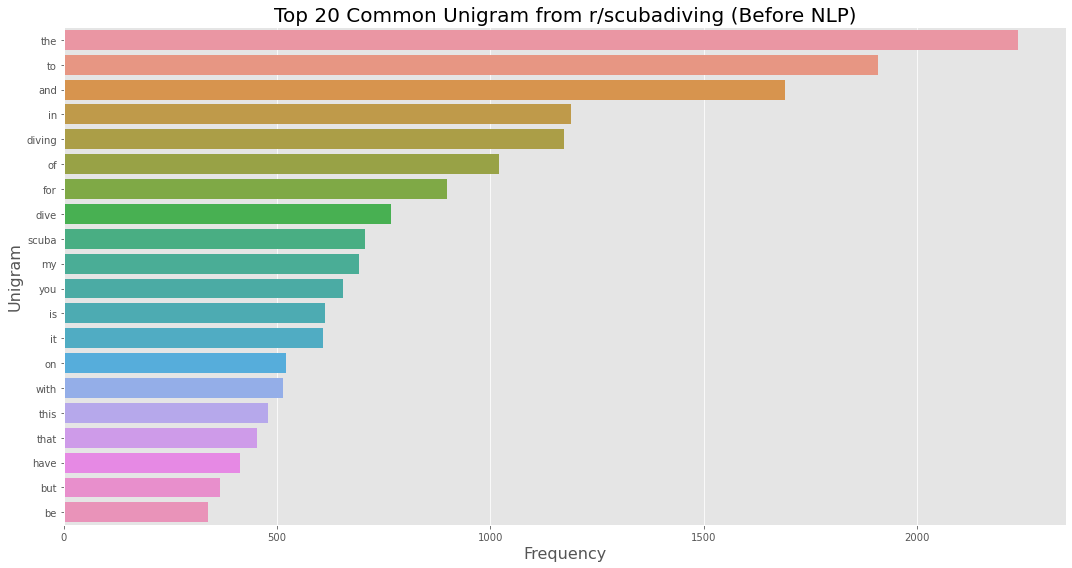

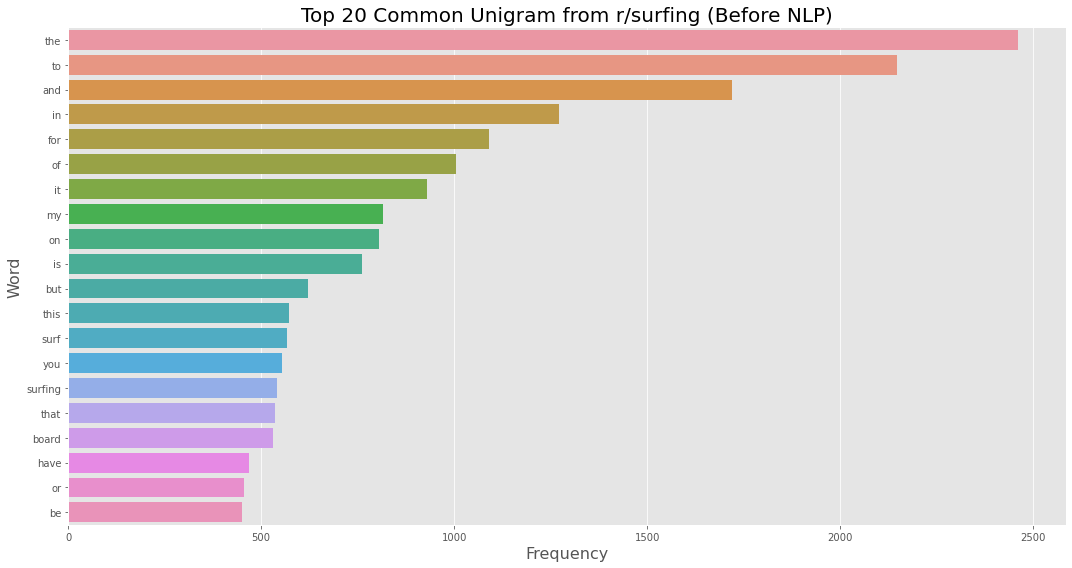

In [40]:
plt.figure(figsize = (15, 8))
dive_unigram_cbar = sns.barplot(x = 'count', y = 'unigram', data = dive_clean_df)
dive_unigram_cbar.axes.set_title('Top 20 Common Unigram from r/scubadiving (Before NLP)',fontsize = 20)
dive_unigram_cbar.set_xlabel('Frequency',fontsize=16)
dive_unigram_cbar.set_ylabel('Unigram',fontsize=16)
plt.tight_layout()
plt.savefig('../images/scubadiving_unigram_barplot+aftercleanup.png')
plt.show()

plt.figure(figsize = (15, 8))
surf_unigram_b4cbar = sns.barplot(x = 'count', y = 'unigram', data = surf_clean_df)
surf_unigram_b4cbar.axes.set_title('Top 20 Common Unigram from r/surfing (Before NLP)',fontsize = 20)
surf_unigram_b4cbar.set_xlabel('Frequency',fontsize=16)
surf_unigram_b4cbar.set_ylabel('Word',fontsize=16)
plt.tight_layout()
plt.savefig('../images/surfing_unigram_barplot_aftercleanup.png')
plt.show()

---

# Stemming VS Lemmatization
The process of Lemmatization deals with the semantics, morphology and the parts-of-speech (POS) the word belongs to, while Stemming refers to a crude heuristic process that chops off the ends of words, and this often includes the removal of derivational affixes [(source)](https://towardsdatascience.com/building-a-text-normalizer-using-nltk-ft-pos-tagger-e713e611db8), as it does not consider how a word is being used, hence leading to not so meaningful stems. 

In most applications, lemmatization performs better than stemming. However, before we decide on whether to use stemming or lemmatization, we shall use some observations in the DataFrame to compare how stemming and lemmatization work on these text.

In [41]:
# create copies of the DataFrame to compare between Stemming and Lemmatizing
stem_df = df.copy()
lem_df = df.copy()

In [42]:
stem_df.head()

,diving,text
0,1,going diving tomorrow for an open water cert a...
1,1,diving with swimmers ear
2,1,big hungry fish
3,1,dusk at blue heron bridge rivera beach fl usa ...
4,1,mark v inspired dive helmet lamp decoration im...


In [43]:
lem_df.head()

,diving,text
0,1,going diving tomorrow for an open water cert a...
1,1,diving with swimmers ear
2,1,big hungry fish
3,1,dusk at blue heron bridge rivera beach fl usa ...
4,1,mark v inspired dive helmet lamp decoration im...


## Stemming
We shall use SnowballStemmer instead of PorterStemmer as it is an improved and more agressive version of the PorterStemmer.

In [44]:
start_timer = time.time()
stem_df['text'] = stem_df.text.apply(stemming_text)
end_timer = time.time()
print('Total elapsed time in seconds:', end_timer - start_timer)

Total elapsed time in seconds: 1.2335243225097656


In [45]:
print(stem_df['text'][0])

go dive tomorrow for an open water cert and doc has told me i have swimmer ear today go dive tomorrow for an open water cert and doc has told me i have swimmer ear today i have no pain or irrit a few day ago i went swim and equalis with no pain should i go or skip out and leav it for anoth day doc has prescrib me antibiot if i did dive can i take these in conjunct with the dive


In [46]:
print(stem_df['text'][100])

what group is good for dive at key largo in florida i want to go to the nation park and rainbow reef doe anyon know a good dive shop to go with i would also like to look into get some certif while there


In [47]:
print(stem_df['text'][200])

i went scuba dive and now im spit fresh blood is this ok it was my first time scuba dive my lefi ear hurt a lot when we first decend and equal didnt work i ask the instructor to take me back up then we went back down and it was less pain but we made it to the floor dubai mall shark aquarium now im spit blood and my left ear realli hurt what should i do


In [48]:
dive_stem = get_top_n_words(stem_df[stem_df['diving'] == 1]['text'], 20)
surf_stem = get_top_n_words(stem_df[stem_df['diving'] == 0]['text'], 20)

dive_stem_df = pd.DataFrame(dive_stem, columns = ['unigram' , 'count'])
surf_stem_df = pd.DataFrame(surf_stem, columns = ['unigram' , 'count'])

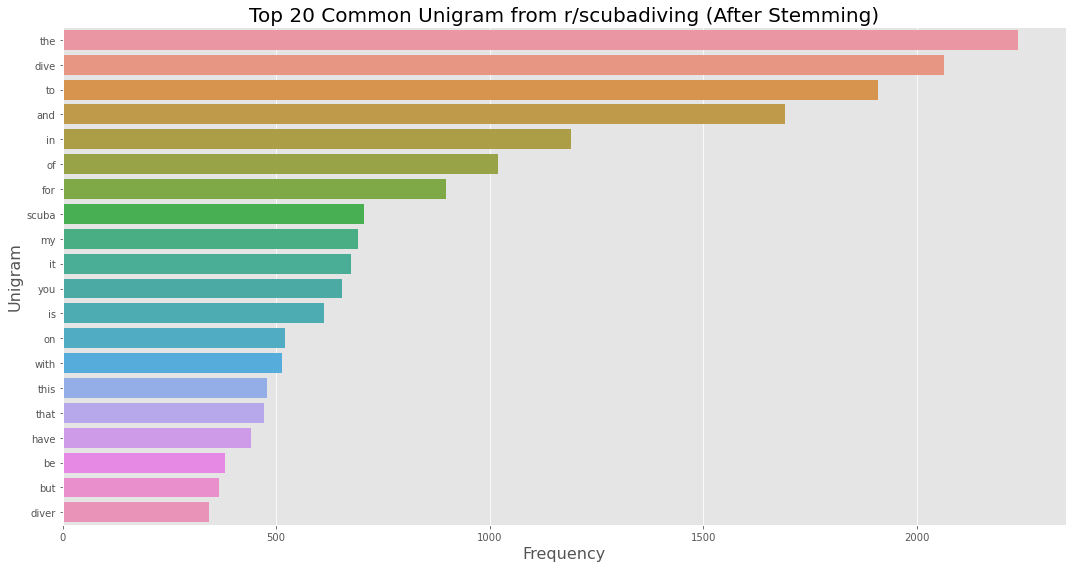

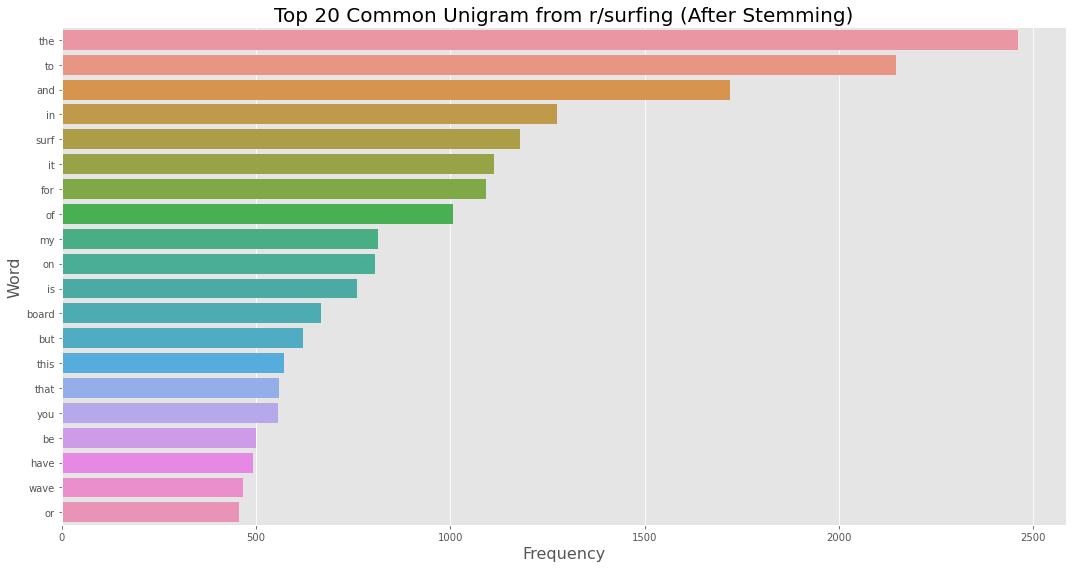

In [49]:
plt.figure(figsize = (15, 8))
dive_unigram_stembar = sns.barplot(x = 'count', y = 'unigram', data = dive_stem_df)
dive_unigram_stembar.axes.set_title('Top 20 Common Unigram from r/scubadiving (After Stemming)',fontsize = 20)
dive_unigram_stembar.set_xlabel('Frequency',fontsize=16)
dive_unigram_stembar.set_ylabel('Unigram',fontsize=16)
plt.tight_layout()
plt.savefig('../images/scubadiving_unigram_barplot_afterstemming.png')
plt.show()

plt.figure(figsize = (15, 8))
surf_unigram_stembar = sns.barplot(x = 'count', y = 'unigram', data = surf_stem_df)
surf_unigram_stembar.axes.set_title('Top 20 Common Unigram from r/surfing (After Stemming)',fontsize = 20)
surf_unigram_stembar.set_xlabel('Frequency',fontsize=16)
surf_unigram_stembar.set_ylabel('Word',fontsize=16)
plt.tight_layout()
plt.savefig('../images/surfing_unigram_barplot_afterstemming.png')
plt.show()

## Lemmatization

In [50]:
start_timer = time.time()
lem_df['text'] = lem_df.text.apply(lemmatize_text)
end_timer = time.time()
print('Total elapsed time in seconds:', end_timer - start_timer)

Total elapsed time in seconds: 45.68630409240723


In [51]:
print(lem_df['text'][0])

go dive tomorrow for an open water cert and doc have told me i have swimmer ear today go dive tomorrow for an open water cert and doc have told me i have swimmer ear today i have no pain or irritation a few day ago i go swim and equalise with no pain should i go or skip out and leave it for another day doc have prescribed me antibiotic if i do dive can i take these in conjunction with the dive


In [52]:
print(lem_df['text'][100])

what group be good for dive at key largo in florida i want to go to the national park and rainbow reef do anyone know a good dive shop to go with i would also like to look into get some certification while there


In [53]:
print(lem_df['text'][200])

i go scuba dive and now im spit fresh blood be this ok it be my first time scuba dive my lefy ear hurt a lot when we first decended and equalize didnt work i ask the instructor to take me back up then we go back down and it be less painful but we make it to the floor dubai mall shark aquarium now im spit blood and my left ear really hurt what should i do


In [54]:
dive_lem = get_top_n_words(lem_df[lem_df['diving'] == 1]['text'], 20)
surf_lem = get_top_n_words(lem_df[lem_df['diving'] == 0]['text'], 20)

dive_lem_df = pd.DataFrame(dive_lem, columns = ['unigram' , 'count'])
surf_lem_df = pd.DataFrame(surf_lem, columns = ['unigram' , 'count'])

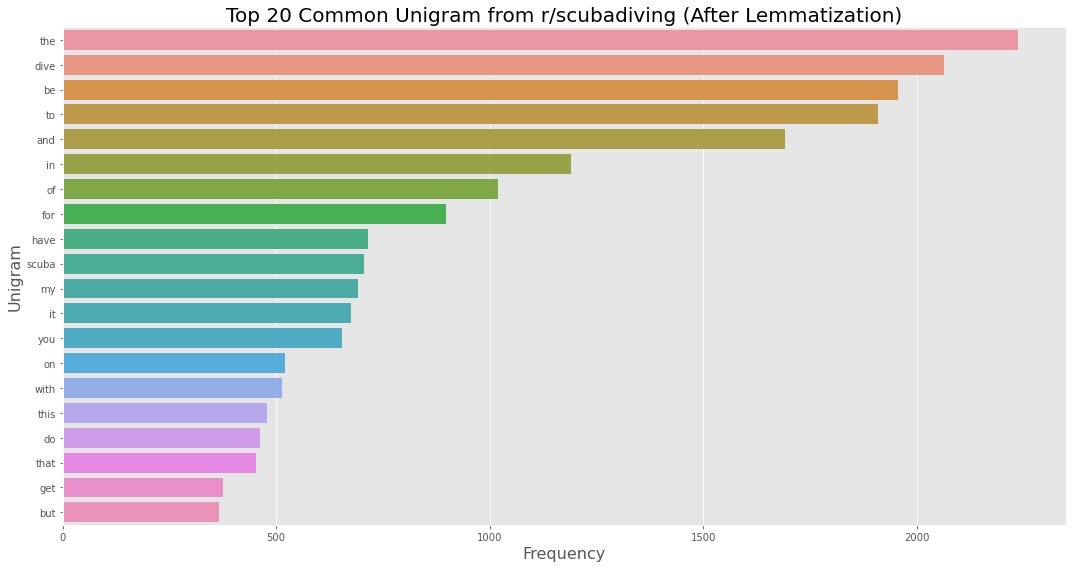

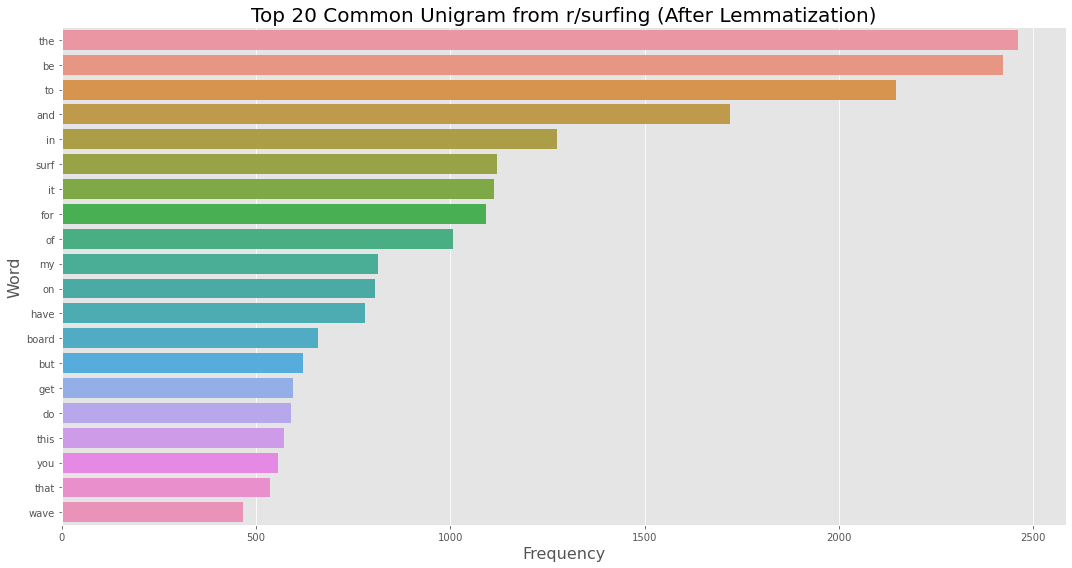

In [55]:
plt.figure(figsize = (15, 8))
dive_unigram_lembar = sns.barplot(x = 'count', y = 'unigram', data = dive_lem_df)
dive_unigram_lembar.axes.set_title('Top 20 Common Unigram from r/scubadiving (After Lemmatization)',fontsize = 20)
dive_unigram_lembar.set_xlabel('Frequency',fontsize=16)
dive_unigram_lembar.set_ylabel('Unigram',fontsize=16)
plt.tight_layout()
plt.savefig('../images/scubadiving_unigram_barplot_afterlemma.png')
plt.show()

plt.figure(figsize = (15, 8))
surf_unigram_lembar = sns.barplot(x = 'count', y = 'unigram', data = surf_lem_df)
surf_unigram_lembar.axes.set_title('Top 20 Common Unigram from r/surfing (After Lemmatization)',fontsize = 20)
surf_unigram_lembar.set_xlabel('Frequency',fontsize=16)
surf_unigram_lembar.set_ylabel('Word',fontsize=16)
plt.tight_layout()
plt.savefig('../images/surfing_unigram_barplot_afterlemma.png')
plt.show()

### Choice: Lemmatization
Refering to `print(stem_df['text'][0])`, words like 'irritation', 'equalise', 'leave', 'prescribe' and 'antibiotic', stemming changed the these words to 'irritat', 'equalis', 'leav', 'prescib' and 'antibiot' which are no longer meaningful now. As lemmatization will give us complete English words while reducing words to their core meaning, it kept these words intact.

Even though stemming takes a much shorter time to process than lemmatization, we will use lemmatization in this project as it is important for us to preserve the meaning of the original words.

It is difficult to compare the difference between the top 20 words after stemming and after lemmatization because most of these words are stop words such as 'the', 'be', 'to', 'and', 'in', etc., which are not related to scubadiving and surfing, and hence not very meaningful. We will now filter out stop words to see if we will get more meaningful words.

---

# Stop Words
Stop words are the most common words in a body of text that can be removed (in most cases) without affecting the overall message enough to lose its meaning. These words are often removed during natural language processing to improve search and other analytical efficiencies as fewer words to process also mean less processing time.

In [56]:
# copy lem_df to df
df = lem_df.copy()
df.head()

,diving,text
0,1,go dive tomorrow for an open water cert and do...
1,1,dive with swimmer ear
2,1,big hungry fish
3,1,dusk at blue heron bridge rivera beach fl usa ...
4,1,mark v inspire dive helmet lamp decoration im ...


In [57]:
df['text'] = df.text.apply(filter_stopwords)

In [58]:
print(df['text'][0])

go tomorrow open water cert doc told swimmer ear today go tomorrow open water cert doc told swimmer ear today pain irritation day ago go swim equalise pain go skip leave another day doc prescribed antibiotic take conjunction


In [59]:
print(df['text'][100])

group good key largo florida want go national park rainbow reef know good shop go also like get certification


In [60]:
print(df['text'][200])

go spit fresh blood ok first time lefy ear hurt lot first decended equalize didnt work ask instructor take back go back less painful make floor dubai mall shark aquarium spit blood left ear really hurt


In [61]:
df.head()

,diving,text
0,1,go tomorrow open water cert doc told swimmer e...
1,1,swimmer ear
2,1,big hungry fish
3,1,dusk blue heron bridge rivera beach fl usa x20...
4,1,mark v inspire helmet lamp decoration building


---

# Unigrams, Bigrams and Trigrams

## Unigrams

In [62]:
dive_unigram = get_top_n_words(df[df['diving'] == 1]['text'], 20)
surf_unigram = get_top_n_words(df[df['diving'] == 0]['text'], 20)

dive_unigram_df = pd.DataFrame(dive_unigram, columns = ['unigram' , 'count'])
surf_unigram_df = pd.DataFrame(surf_unigram, columns = ['unigram' , 'count'])

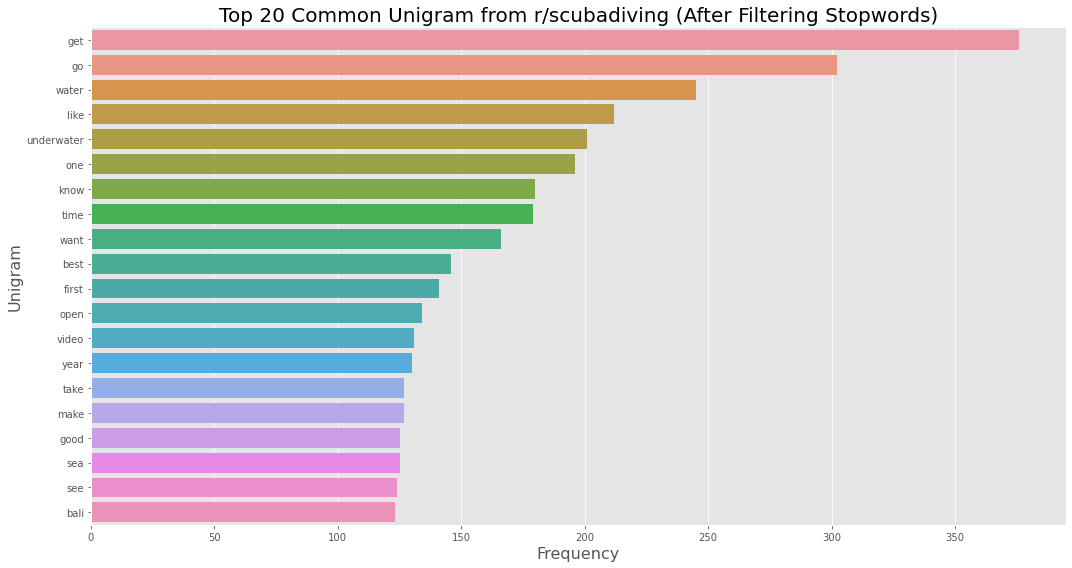

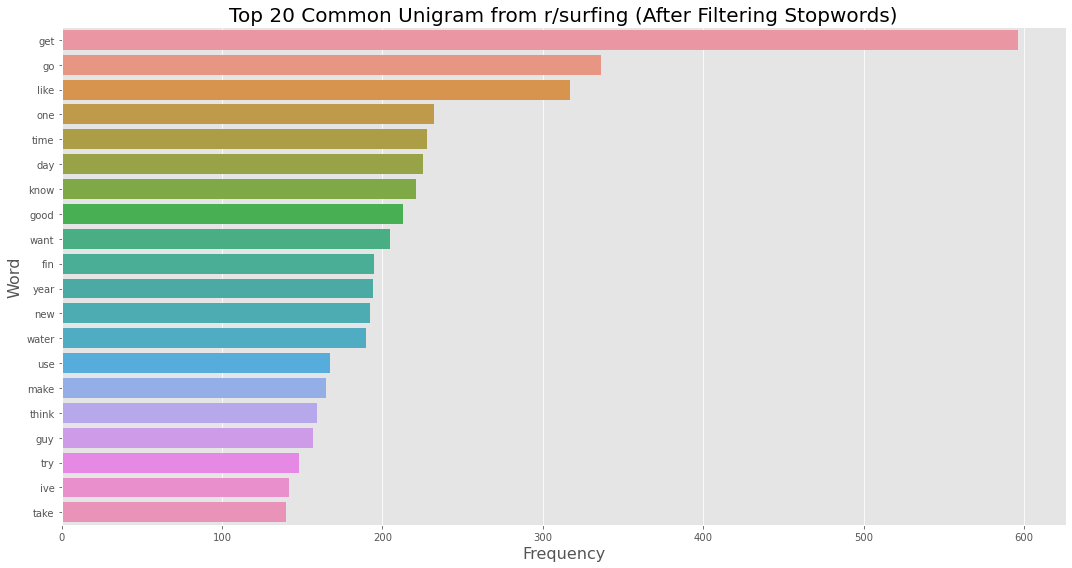

In [63]:
plt.figure(figsize = (15, 8))
dive_unigram_bar = sns.barplot(x = 'count', y = 'unigram', data = dive_unigram_df)
dive_unigram_bar.axes.set_title('Top 20 Common Unigram from r/scubadiving (After Filtering Stopwords)',fontsize = 20)
dive_unigram_bar.set_xlabel('Frequency',fontsize=16)
dive_unigram_bar.set_ylabel('Unigram',fontsize=16)
plt.tight_layout()
plt.savefig('../images/scubadiving_unigram_barplot_afterstop.png')
plt.show()

plt.figure(figsize = (15, 8))
surf_unigram_bar = sns.barplot(x = 'count', y = 'unigram', data = surf_unigram_df)
surf_unigram_bar.axes.set_title('Top 20 Common Unigram from r/surfing (After Filtering Stopwords)',fontsize = 20)
surf_unigram_bar.set_xlabel('Frequency',fontsize=16)
surf_unigram_bar.set_ylabel('Word',fontsize=16)
plt.tight_layout()
plt.savefig('../images/surfing_unigram_barplot_afterstop.png')
plt.show()

After filtering out stopwords, we are getting more meaningful words that are related to the individual subreddits for the top 20 common unigrams. 

## Bigrams

In [64]:
dive_bigram = get_top_n_bigram(df[df['diving'] == 1]['text'], 20)
dive_bigram_df = pd.DataFrame(dive_bigram, columns = ['bigram' , 'count'])

surf_bigram = get_top_n_bigram(df[df['diving'] == 0]['text'], 20)
surf_bigram_df = pd.DataFrame(surf_bigram, columns = ['bigram' , 'count'])

In [65]:
dive_bigram_df

,bigram,count
0,open water,104
1,first time,37
2,hope enjoy,36
3,get certify,35
4,red sea,35
5,thanks advance,23
6,let know,22
7,marine life,22
8,padi open,20
9,water certification,18


In [66]:
surf_bigram_df

,bigram,count
0,san diego,29
1,first time,28
2,seem like,24
3,fin box,24
4,east coast,24
5,feel like,24
6,thanks advance,23
7,costa rica,23
8,get well,20
9,beach break,20


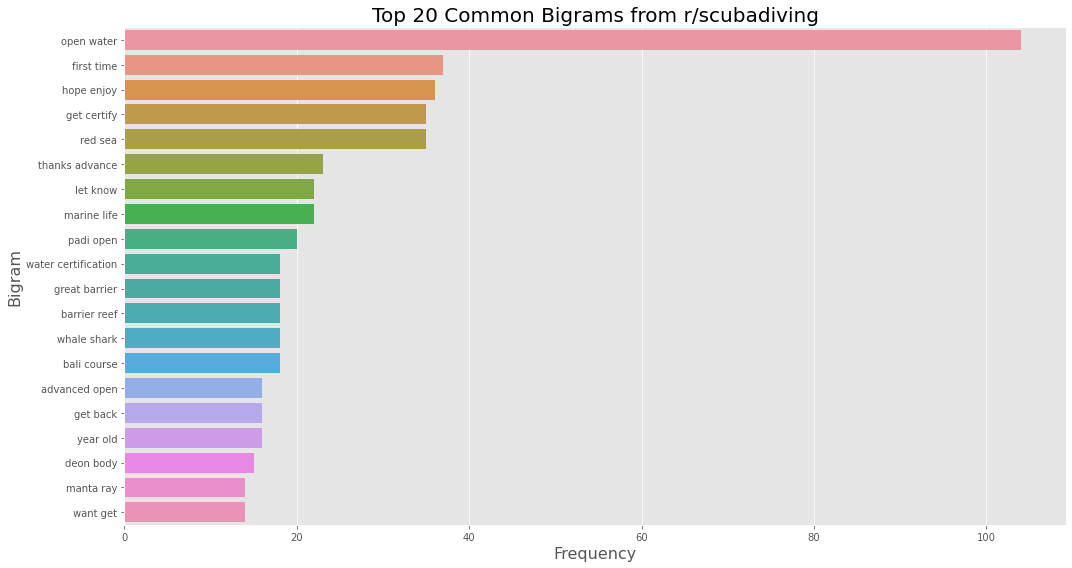

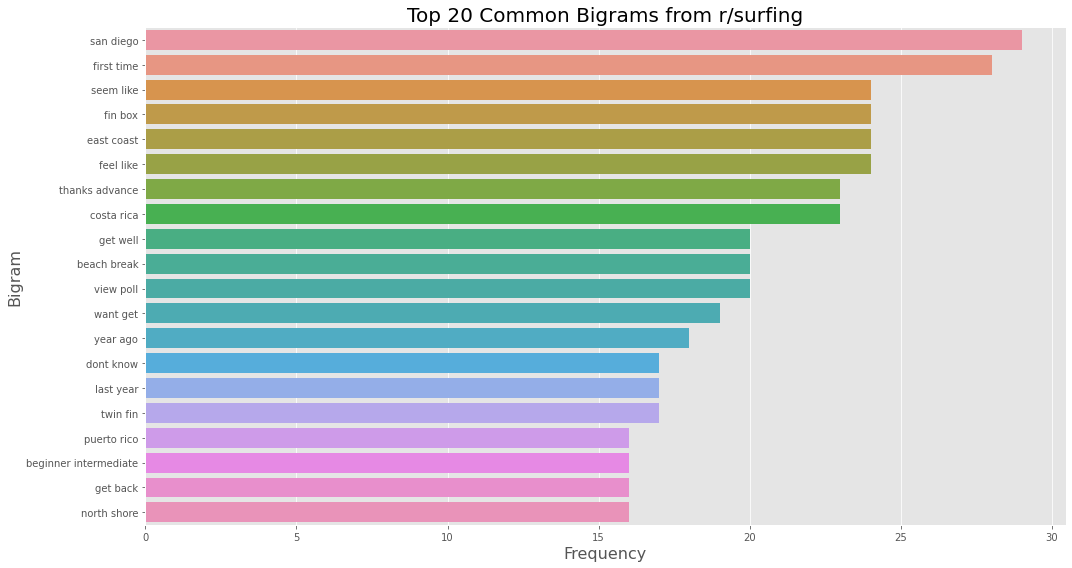

In [67]:
plt.figure(figsize = (15, 8))
dive_bigram_bar = sns.barplot(x = 'count', y = 'bigram', data = dive_bigram_df)
dive_bigram_bar.axes.set_title('Top 20 Common Bigrams from r/scubadiving',fontsize = 20)
dive_bigram_bar.set_xlabel('Frequency',fontsize=16)
dive_bigram_bar.set_ylabel('Bigram',fontsize=16)
plt.tight_layout()
plt.savefig('../images/scubadiving_bigram_barplot.png')
plt.show()

plt.figure(figsize = (15, 8))
surf_bigram_bar = sns.barplot(x = 'count', y = 'bigram', data = surf_bigram_df)
surf_bigram_bar.axes.set_title('Top 20 Common Bigrams from r/surfing',fontsize = 20)
surf_bigram_bar.set_xlabel('Frequency',fontsize=16)
surf_bigram_bar.set_ylabel('Bigram',fontsize=16)
plt.tight_layout()
plt.savefig('../images/surfing_bigram_barplot.png')
plt.show()

## Trigrams

In [68]:
dive_trigram = get_top_n_trigram(df[df['diving'] == 1]['text'], 20)
dive_trigram_df = pd.DataFrame(dive_trigram, columns = ['trigram' , 'count'])

surf_trigram = get_top_n_trigram(df[df['diving'] == 0]['text'], 20)
surf_trigram_df = pd.DataFrame(surf_trigram, columns = ['trigram' , 'count'])

In [69]:
dive_trigram_df

,trigram,count
0,padi open water,20
1,open water certification,18
2,great barrier reef,18
3,advanced open water,16
4,open water certify,10
5,get open water,8
6,blue heron bridge,7
7,hope enjoy short,7
8,open water cert,6
9,underwater photo video,6


In [70]:
surf_trigram_df

,trigram,count
0,happy new year,7
1,november 2021 australia,5
2,seem like good,4
3,ocean beach sf,4
4,want get well,4
5,front chest zip,4
6,ocean beach san,3
7,please let know,3
8,get back water,3
9,golden gate bridge,3


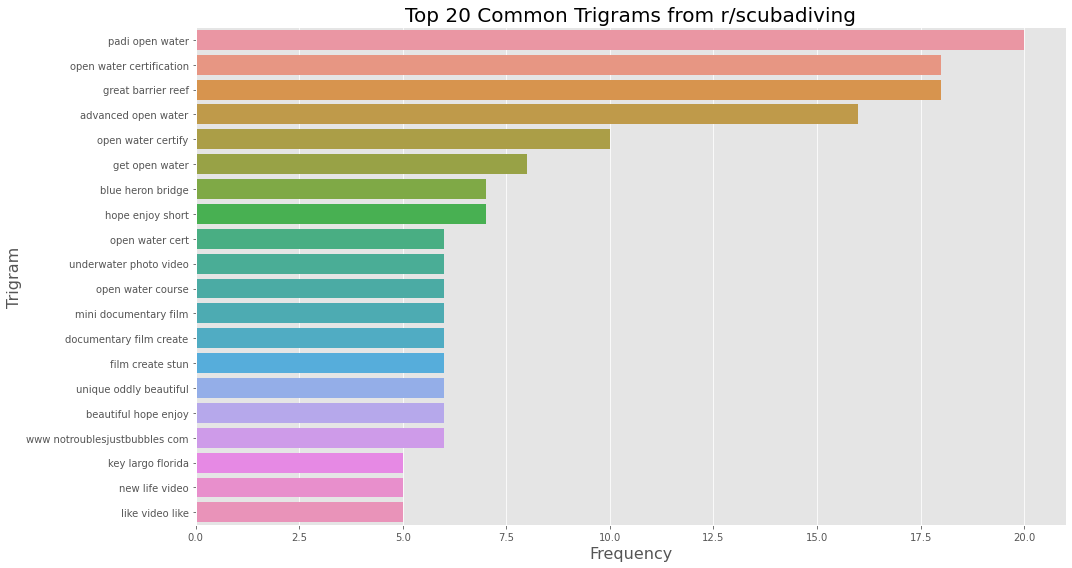

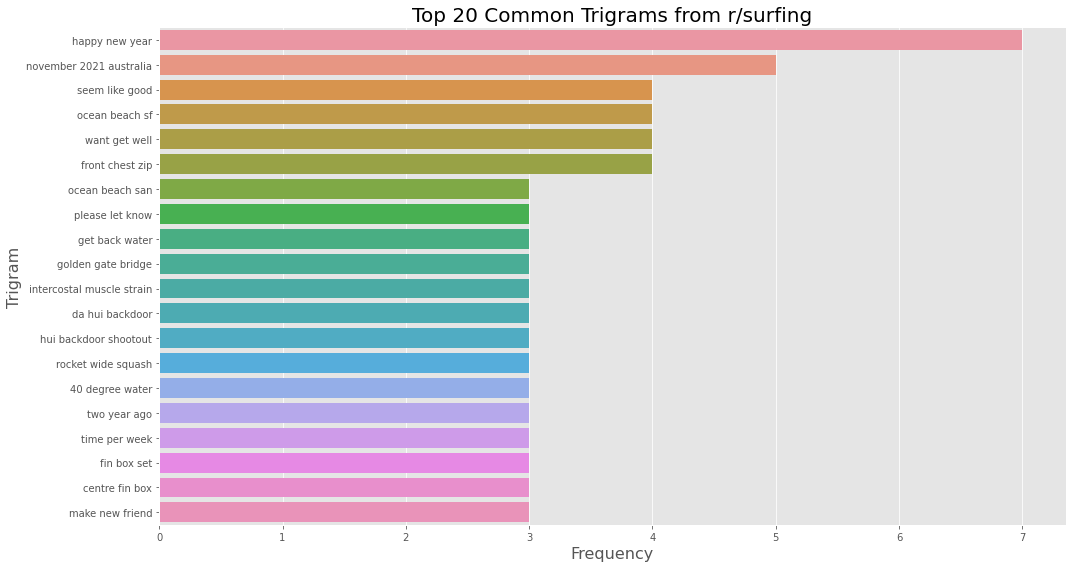

In [71]:
plt.figure(figsize = (15, 8))
dive_trigram_bar = sns.barplot(x = 'count', y = 'trigram', data = dive_trigram_df)
dive_trigram_bar.axes.set_title('Top 20 Common Trigrams from r/scubadiving',fontsize = 20)
dive_trigram_bar.set_xlabel('Frequency',fontsize=16)
dive_trigram_bar.set_ylabel('Trigram',fontsize=16)
plt.tight_layout()
plt.savefig('../images/scubadiving_trigram_barplot.png')
plt.show()

plt.figure(figsize = (15, 8))
surf_bigram_bar = sns.barplot(x = 'count', y = 'trigram', data = surf_trigram_df)
surf_bigram_bar.axes.set_title('Top 20 Common Trigrams from r/surfing',fontsize = 20)
surf_bigram_bar.set_xlabel('Frequency',fontsize=16)
surf_bigram_bar.set_ylabel('Trigram',fontsize=16)
plt.tight_layout()
plt.savefig('../images/surfing_trigram_barplot.png')

plt.show()

Words including {'im', 'would', 'gon', 'na', 'hey', 'anyone'} have been added to the stopword list after running the top 20 common words barplots a few times after noting that these words which do not hold much meaning are showing up on the barplots. 

---

# Export to CSV
Cleaned and preprocessed data is exported for use in the notebook 3, `03_Modelling`.

In [72]:
df

,diving,text
0,1,go tomorrow open water cert doc told swimmer e...
1,1,swimmer ear
2,1,big hungry fish
3,1,dusk blue heron bridge rivera beach fl usa x20...
4,1,mark v inspire helmet lamp decoration building
...,...,...
3904,0,need change stance
3905,0,guadeloupe christmas surfed guadeloupe lately ...
3906,0,search rideshare fuerteventura week
3907,0,epicly big gulf coast clearwater beach


In [73]:
df['text'].iloc[590]

''

In [74]:
df.to_csv('../data/subreddits_cleaned.csv')

---

# Appendix

## Word Cloud

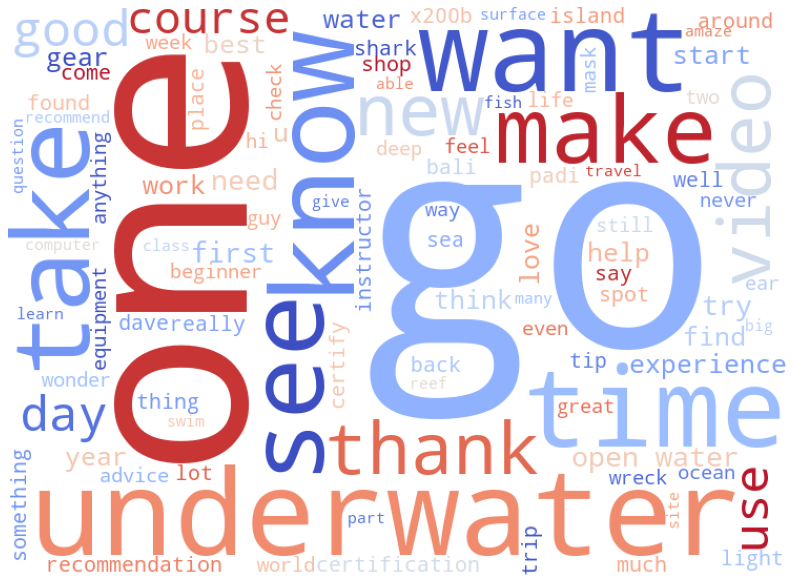

In [79]:
text = ' '
for x in df[df['diving']== 1]['text']: 
      
    # typecaste each val to string 
    x = str(x) 
  
    # split the value 
    values = x.split(' ') 
      
    # Converts each token into lowercase 
    for i in range(len(values)): 
        values[i] = values[i].lower() 
          
    for words in values: 
        text = text + words + ' '
  
  
word_cloud = WordCloud(max_words= 100,
                      width = 744, 
                      height = 544,
                      background_color ='white',
                      contour_width=3, 
                      colormap='coolwarm',
                      min_font_size = 10).generate(text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (14, 14)) 
plt.imshow(word_cloud) 
plt.axis("off")
plt.savefig('../images/diving_wordcloud.png')

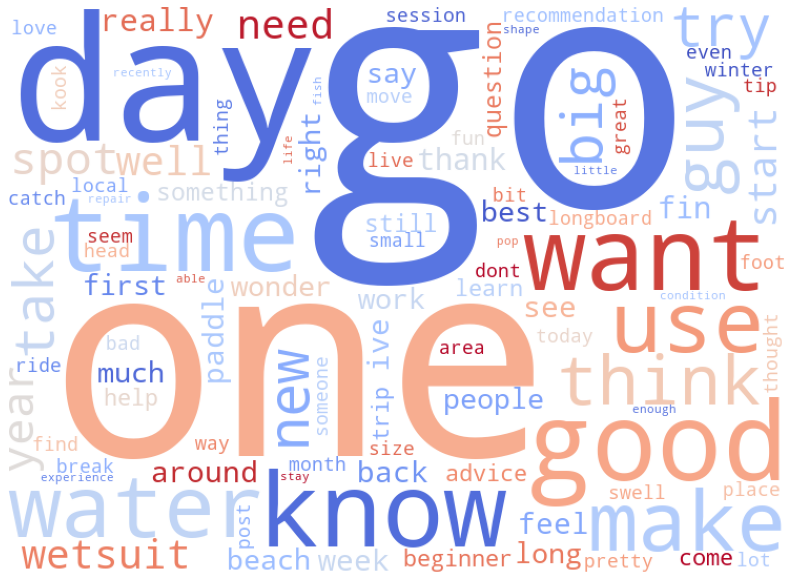

In [76]:
text = ' '
for x in df[df['diving']== 0]['text']: 
      
    # typecaste each val to string 
    x = str(x) 
  
    # split the value 
    values = x.split(' ') 
      
    # Converts each token into lowercase 
    for i in range(len(values)): 
        values[i] = values[i].lower() 
          
    for words in values: 
        text = text + words + ' '
  
  
word_cloud = WordCloud(max_words= 100,
                      width = 744, 
                      height = 544,
                      background_color ='white',
                      contour_width=3, 
                      colormap='coolwarm',
                      min_font_size = 10).generate(text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (14, 14)) 
plt.imshow(word_cloud) 
plt.axis("off")
plt.savefig('../images/surfing_wordcloud.png')